In [2]:
# playing with redshifts and group data
import numpy as np
import h5py
import hdf5plugin
import pandas as pd
import matplotlib.pyplot as plt


/var/folders/yn/_ch1_n7x7y1g91hrx1ljp5n80000gp/T/ipykernel_40138/167218902.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Reading Snapshots
cat = '../CV_0/fof_subhalo_tab_000.hdf5'
# open file
f = h5py.File(cat, 'r')

# read different attributes of the header
BoxSize      = f['Header'].attrs[u'BoxSize']/1e3 #Mpc/h
redshift     = f['Header'].attrs[u'Redshift']
print('BoxSize: ', BoxSize)
print('redshift: ', redshift)
mass_data = f['Subhalo/SubhaloMassType'][:,4]*1e10
mass_data = mass_data[mass_data != 0]


BoxSize:  25.0
redshift:  5.994167484881114


In [4]:
# function for getting data locally:
def getdata(filename):
    with h5py.File(filename, 'r') as f:

        # read different attributes of the header
        BoxSize      = f['Header'].attrs[u'BoxSize']/1e3 #Mpc/h
        redshift     = f['Header'].attrs[u'Redshift']
        redshift = round(redshift, 1)
        print('BoxSize: ', BoxSize)
        print('redshift: ', redshift)

        mass_data = f['Subhalo/SubhaloMassType'][:,4]*1e10
        mass_data = mass_data[mass_data != 0]
        print('Mass Data :', mass_data)
        
        V = BoxSize**3
        Vcom = V * ((1+redshift)**3)

        return mass_data, redshift, Vcom
    

In [5]:
mass_000, z_000, V_000 = getdata('../CV_0/fof_subhalo_tab_000.hdf5')
mass_001, z_001, V_001 = getdata('../CV_0/fof_subhalo_tab_001.hdf5')
mass_004, z_004, V_004 = getdata('../CV_0/fof_subhalo_tab_004.hdf5')
mass_010, z_010, V_010 = getdata('../CV_0/fof_subhalo_tab_010.hdf5')
mass_019, z_019, V_019 = getdata('../CV_0/fof_subhalo_tab_019.hdf5')
mass_025, z_025, V_025 = getdata('../CV_0/fof_subhalo_tab_025.hdf5')
mass_033, z_033, V_033 = getdata('../CV_0/fof_subhalo_tab_033.hdf5')


BoxSize:  25.0
redshift:  6.0
Mass Data : [4.32055040e+09 1.30163816e+08 1.18750280e+08 ... 1.30006040e+07
 1.60405690e+07 1.55665360e+07]
BoxSize:  25.0
redshift:  5.0
Mass Data : [1.7731748e+10 4.2904924e+07 1.7092715e+08 ... 8.5683240e+06 1.4270936e+07
 1.2571175e+07]
BoxSize:  25.0
redshift:  3.0
Mass Data : [9.2230148e+10 4.9100662e+09 9.7839985e+09 ... 1.4136758e+07 8.4031430e+06
 9.3940160e+06]
BoxSize:  25.0
redshift:  2.0
Mass Data : [1.1311316e+11 9.2842680e+09 1.9073932e+09 ... 1.3451332e+07 1.7460794e+07
 1.1784530e+07]
BoxSize:  25.0
redshift:  1.0
Mass Data : [1.3471657e+11 9.0320323e+10 5.4883705e+10 ... 8.5497600e+06 2.3423306e+07
 8.9830850e+06]
BoxSize:  25.0
redshift:  0.5
Mass Data : [2.5544894e+11 1.0854620e+11 1.4533869e+10 ... 1.3666457e+07 7.6637965e+06
 2.2851466e+07]
BoxSize:  25.0
redshift:  0.0
Mass Data : [4.2678937e+11 2.3985320e+10 1.5511638e+10 ... 1.0028534e+07 1.1659573e+07
 9.8958960e+06]


In [6]:
def mass_fun(mass, V, nbins):
    # mass is our mass data in Msol
    # V is comoving Survey volume Vcom = Vphys(1+z)^3
    # nbins is number of bins

    M     = mass         #Read stellar masses in Msun
    logM  = np.log10(M)                     #Take logarithm

    # calc histogram
    Phi,edg = np.histogram(logM,bins=nbins) #Unnormalized histogram and bin edges

    dM    = edg[1] - edg[0]                 #Bin size
    Max   = edg[0:-1] + dM/2.               #Mass axis
    Phi   = Phi / V / dM                    #Normalize to volume and bin size

    return Phi, Max

In [7]:
# using data: mass_000, z_000, V_000
Phi_000, Max_000 = mass_fun(mass_000, V_000, 10)
Phi_001, Max_001 = mass_fun(mass_001, V_001, 10)
Phi_004, Max_004 = mass_fun(mass_004, V_004, 10)
Phi_010, Max_010 = mass_fun(mass_010, V_010, 10)
Phi_019, Max_019 = mass_fun(mass_019, V_019, 10)
Phi_025, Max_025 = mass_fun(mass_025, V_025, 10)
Phi_033, Max_033 = mass_fun(mass_033, V_033, 10)


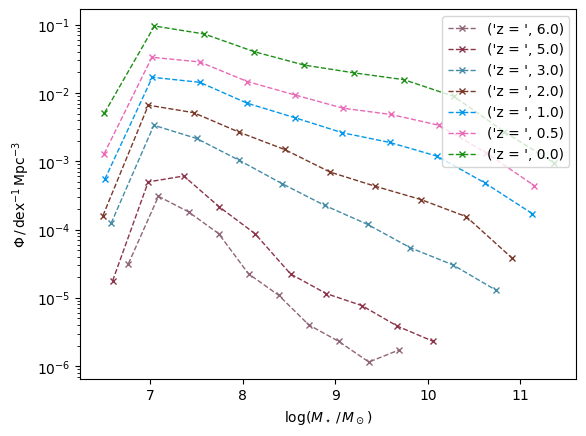

In [8]:
label_000 = 'z = ', z_000
label_001 = 'z = ', z_001
label_004 = 'z = ', z_004
label_010 = 'z = ', z_010
label_019 = 'z = ', z_019
label_025 = 'z = ', z_025
label_033 = 'z = ', z_033


plt.clf()
plt.yscale('log')
plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi\,/\,\mathrm{dex}^{-1}\,\mathrm{Mpc}^{-3}$')


# plot the data

plt.plot(Max_000,Phi_000, color=np.random.rand(3,), marker='x', linestyle='dashed', linewidth=1, markersize=5, label=label_000)
plt.plot(Max_001,Phi_001, color=np.random.rand(3,), marker='x', linestyle='dashed', linewidth=1, markersize=5, label=label_001)
plt.plot(Max_004,Phi_004, color=np.random.rand(3,), marker='x', linestyle='dashed', linewidth=1, markersize=5, label=label_004)
plt.plot(Max_010,Phi_010, color=np.random.rand(3,), marker='x', linestyle='dashed', linewidth=1, markersize=5, label=label_010)
plt.plot(Max_019,Phi_019, color=np.random.rand(3,), marker='x', linestyle='dashed', linewidth=1, markersize=5, label=label_019)
plt.plot(Max_025,Phi_025, color=np.random.rand(3,), marker='x', linestyle='dashed', linewidth=1, markersize=5, label=label_025)
plt.plot(Max_033,Phi_033, color=np.random.rand(3,), marker='x', linestyle='dashed', linewidth=1, markersize=5, label=label_033)


plt.legend(loc="upper right")
